In [1]:
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG

from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
counter=0
def moltosvg(mol,molSize=(450,150),kekulize=True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    global counter
    with open(f"mol{counter}.svg", "w") as filehandle:
        filehandle.write(svg)
    print(counter)
    counter += 1
    return svg
def render_svg(svg):
    # It seems that the svg renderer used doesn't quite hit the spec.
    # Here are some fixes to make it work in the notebook, although I think
    # the underlying issue needs to be resolved at the generation step
    return SVG(svg.replace('svg:',''))

#### Helper function to generate and visualize bigSMILES strings

In [2]:
from bigsmiles_gen import System
def big_smiles_gen(string, plot_id=0):
    # Consistent random numbers also across calls
    rng = np.random.default_rng(42)
    # Generate the abstract python object, parsing bigSMILES
    ext = System(big)
    # Generate molecules according to extension
    mols = ext.generate(rng=rng)
    # Draw said molecule
    return render_svg(moltosvg(mols[plot_id].get_mol()))

# Polyesters 
## Di-Carboxyl Acids with 2-5 middle C total Mw 500

BigSMILES:

In [3]:
big = "OOC{[$][$]C[$][$]}|uniform(120, 720)|COO.|500|"
big

'OOC{[$][$]C[$][$]}|uniform(120, 720)|COO.|500|'

### Explanation

- `OOC` just normal SMILES for how the first initial group looks like
- `{....}` stochastic object, here just one carbon that is repeated
- `{[$]` and `[$]}` terminal descriptors, how does the stochastic object connect with the pre- and suffix
- `[$]C[$]` one C to repeat, with a bond in front and one at the end
- `|uniform(12, 72)|` extension detailing that the stochastic object is between 12 and 72 g/mol heavy
- `COO` suffix of the molecule
- `.|500|` extension detailing that the total system component of this as a min Mw of 500 g/mol


0


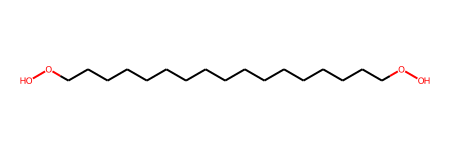

In [4]:
# Plot the first generated molecule
big_smiles_gen(big)

1


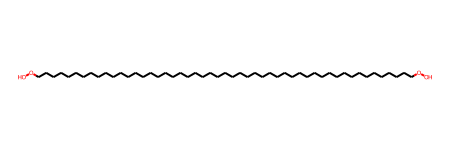

In [5]:
# Generate the second generated molecule
big_smiles_gen(big, 1)

Notice how the repeated C are different because of the stochastic object

## Di-ols with 2-5 middle C total Mw 500

In [6]:
big = "OC{[$][$]C[$][$]}|uniform(12, 72)|CO.|500|"
big

'OC{[$][$]C[$][$]}|uniform(12, 72)|CO.|500|'

2


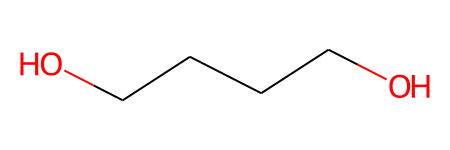

In [7]:
big_smiles_gen(big)

3


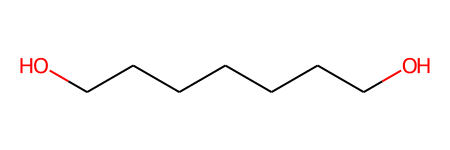

In [8]:
big_smiles_gen(big, 1)

4


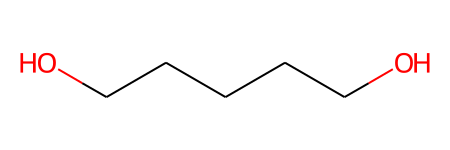

In [9]:
big_smiles_gen(big, 2)

## Di-ols with 2-5 middle Cyclohexane ring total Mw 500

In [60]:
big = "OC{[$][$]C([$])C1CCCCC1[$]}|uniform(84, 420)|CO.|5000|"
big

'OC{[$][$]C([$])C1CCCCC1[$]}|uniform(84, 420)|CO.|5000|'

40


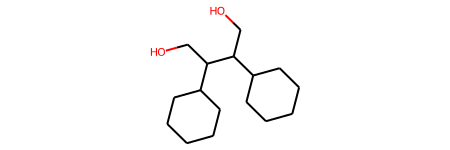

In [61]:
big_smiles_gen(big, 0)

41


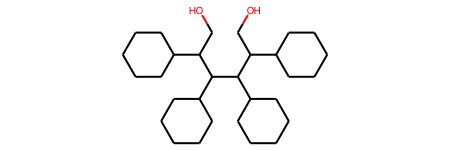

In [62]:
big_smiles_gen(big, 3)

# Polyamides
## Di-Carboxylic Acids

In [13]:
big = "NC{[$][$]C[$][$]}|gauss(60, 24)|COO.|500|"
big

'NC{[$][$]C[$][$]}|gauss(60, 24)|COO.|500|'

7


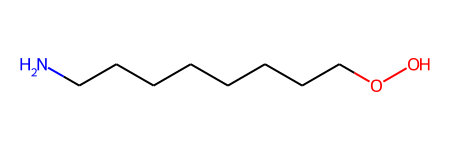

In [14]:
big_smiles_gen(big)

8


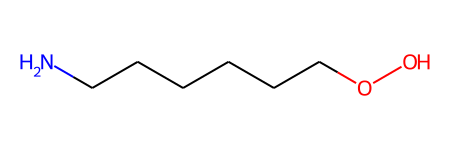

In [15]:
big_smiles_gen(big, 1)

## Diamines

In [16]:
big = "NC{[$][$]C[$][$]}|gauss(60,24)|CN.|500|"
big

'NC{[$][$]C[$][$]}|gauss(60,24)|CN.|500|'

9


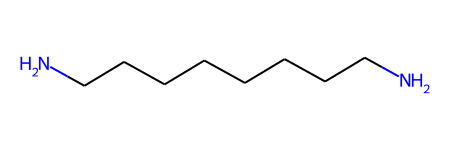

In [17]:
big_smiles_gen(big)

10


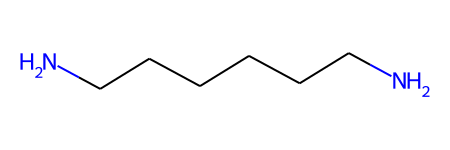

In [18]:
big_smiles_gen(big, 1)

## New: Reaction of diol with di-acid

In [19]:
big = "NC{[$][$]C[$][$]}|uniform(12, 72)|COOC{[$][$]C[$][$]}|uniform(12, 72)|CO.|1000|"
big

'NC{[$][$]C[$][$]}|uniform(12, 72)|COOC{[$][$]C[$][$]}|uniform(12, 72)|CO.|1000|'

11


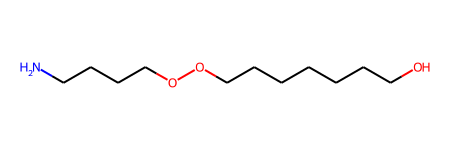

In [20]:
big_smiles_gen(big)

12


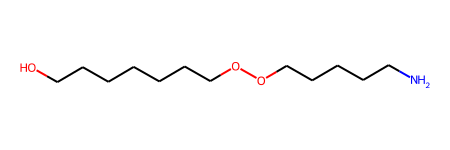

In [21]:
big_smiles_gen(big, 1)

## Same diol and di-acid reaction, but with phenyl ring

In [22]:
big = "NC{[$][$]C[$][$]}|uniform(12, 72)|COOC{[$][$]C([$])C1CCCCC1[$]}|uniform(50, 250)|CO.|1000|"
big

'NC{[$][$]C[$][$]}|uniform(12, 72)|COOC{[$][$]C([$])C1CCCCC1[$]}|uniform(50, 250)|CO.|1000|'

13


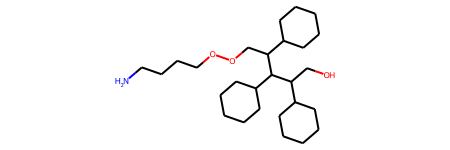

In [23]:
big_smiles_gen(big)

14


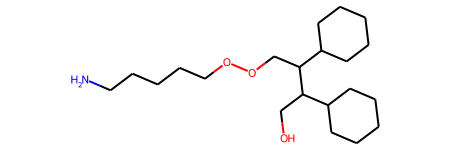

In [24]:
big_smiles_gen(big, 2)

# New! Polyolefins, because a '=' remains

## CH2=CH-(CH2)nCH3  where n varies from 1 to 5

In [25]:
big = "C=C{[$][$]C[$][$]}|uniform(12,60)|C.|500|"
big

'C=C{[$][$]C[$][$]}|uniform(12,60)|C.|500|'

15


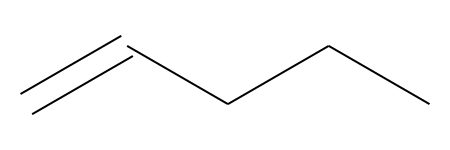

In [26]:
big_smiles_gen(big)

16


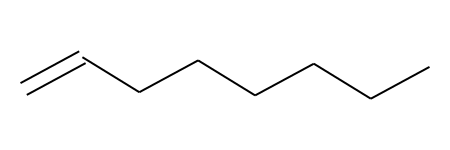

In [27]:
big_smiles_gen(big, 1)

## CH2-CH-(CH2)n-CH=CH2 where n varies from 1 to 3

In [28]:
big = "CC{[$][$]C[$][$]}|uniform(12, 36)|C=C.|500|"
big

'CC{[$][$]C[$][$]}|uniform(12, 36)|C=C.|500|'

17


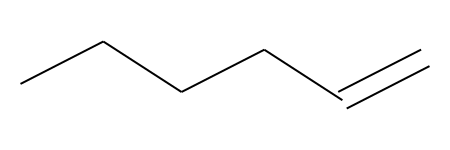

In [29]:
big_smiles_gen(big)

18


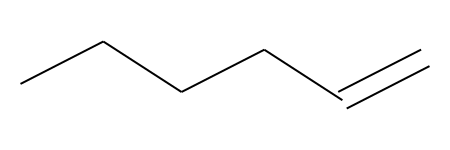

In [30]:
big_smiles_gen(big, 6)

## Classic diblock PS-b-P2VP

In [31]:
big = "[H]{[<][<]C([>])c1ccccc1[>]}|gauss(100,20)|{[<][>]C([<])c1ccncc1[>]}|gauss(100, 20)|[H].|500|"

19


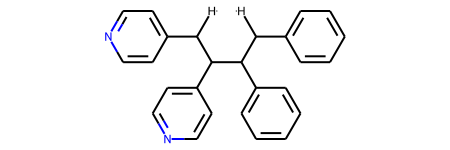

In [32]:
big_smiles_gen(big, 0)

## Polymer in Solvent PS in THF

In [33]:
big = "C1CCOC1.|10%|{[][$]C([$])c1ccccc1; [$][H][]]}|gauss(400,20)|.|500|"

20


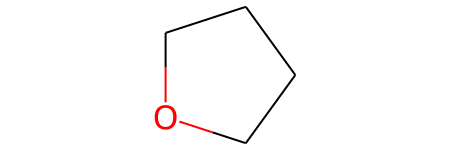

In [34]:
big_smiles_gen(big, 0)

21


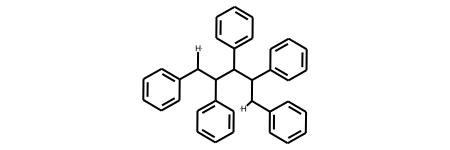

In [35]:
big_smiles_gen(big, 1)

## Poly(acrylic acid butyl - r - acrylamide) (25% acrylamide)

22


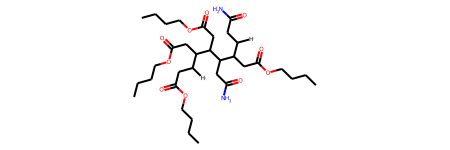

In [36]:
big = "[H]{[<][>|75|]C([<|75|])CC(=O)OCCCC, [<|25|]C([>|25|])CC(=O)N[>]}|gauss(500,50)|[H].|5000|"
big_smiles_gen(big, 0)

23


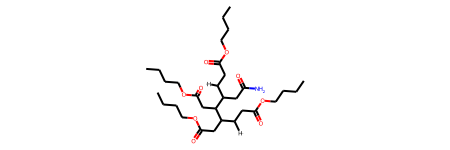

In [37]:
big_smiles_gen(big, 1)

24


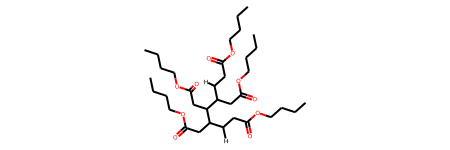

In [38]:
big_smiles_gen(big, 2)

## Vulcanized poly(1,3-butadiene)

25


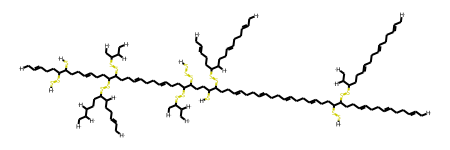

In [39]:
big = "{[][$1|2|]CC=CC[$1|2|], [$1]CC([<])C([<])C[$1], [>]S[$2|10|], [$2]S[$2]; [$1][H], [<][H], [>][H], [$2][H][]}|gauss(2500,500)|.|1000|"
big_smiles_gen(big, 0)

# Example stochastic polymer

26


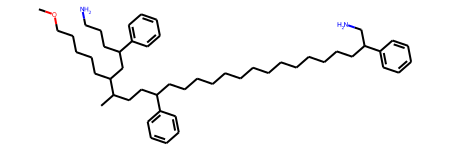

In [40]:
big = "NC{[$] [$|5|]CC[$|5|],[$]C([$])c1ccccc1, [$|0.5|]CCC(C[$|0.1|])CC[$|0.5|]; [$]COC [$]}|uniform(500,1000)|CN.|50000|"
big_smiles_gen(big, 0)

27


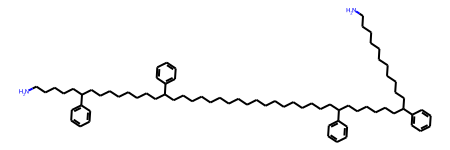

In [41]:
big_smiles_gen(big, 1)

28


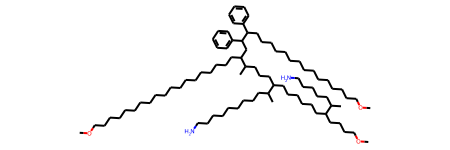

In [42]:
big_smiles_gen(big, 2)

29


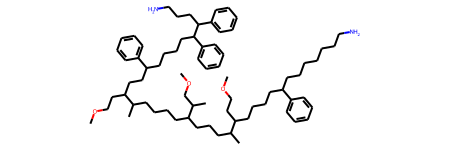

In [43]:
big_smiles_gen(big, 3)

30


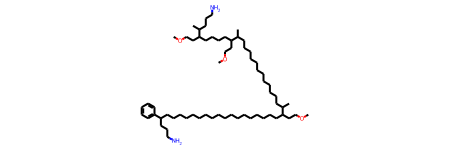

In [44]:
big_smiles_gen(big, 4)

31


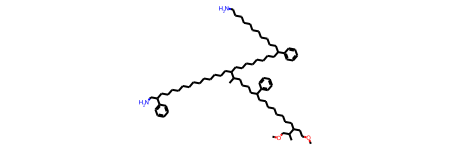

In [45]:
big_smiles_gen(big, 5)

32


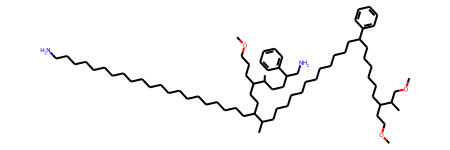

In [46]:
big_smiles_gen(big, 6)

33


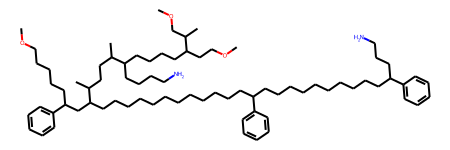

In [47]:
big_smiles_gen(big, 7)

# Motifs

34


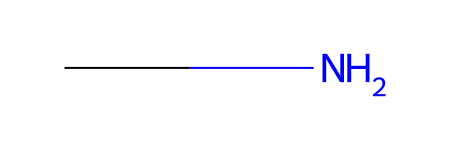

In [48]:
render_svg(moltosvg(Chem.MolFromSmiles("NC")))

35


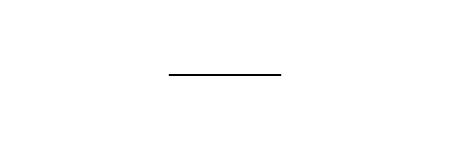

In [49]:
render_svg(moltosvg(Chem.MolFromSmiles("CC")))

36


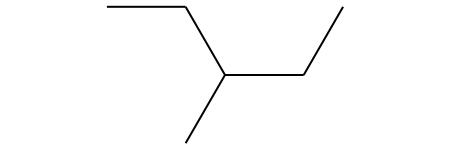

In [50]:
render_svg(moltosvg(Chem.MolFromSmiles("CCC(C)CC")))

37


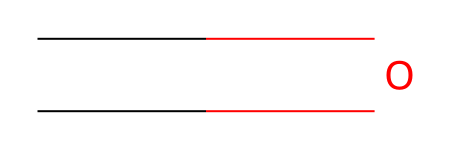

In [51]:
render_svg(moltosvg(Chem.MolFromSmiles("C=O")))

38


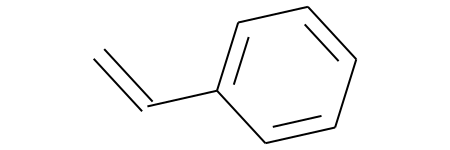

In [52]:
render_svg(moltosvg(Chem.MolFromSmiles("C=Cc1ccccc1")))